In [214]:
import numpy as np
import pandas as pd
import scipy.stats

pd.options.mode.chained_assignment = None
from matplotlib import pyplot as plt, rcParams
# import cv2
import seaborn as sns

sns.set(style="white", context="paper")
from cycler import cycler
import os, sys
import glob
from datetime import datetime, timedelta
from itertools import combinations
import base64
from PIL import Image
from io import BytesIO as _BytesIO
import requests
import json
import pickle
from datetime import datetime
from IPython.display import display, Markdown, Latex
from matplotlib import dates
from sklearn.metrics import *
import collections
from copy import deepcopy
pd.options.display.max_columns = None
def printm(s): return display(Markdown(s))


In [215]:
ts_results, cluster_info = pickle.load(open('ts_results_extra.pb','rb'))
ts_results.keys()

dict_keys(['00EABED2-271D-49D8-B599-1D4A09240601', '098A72A5-E3E5-4F54-A152-BBDA0DF7B694', '0A986513-7828-4D53-AA1F-E02D6DF9561B', '0BFC35E2-4817-4865-BFA7-764742302A2D', '0E6184E1-90C0-48EE-B25A-F1ECB7B9714E', '1155FF54-63D3-4AB2-9863-8385D0BD0A13', '11B5EC4D-4133-4289-B475-4E737182A406', '136562B6-95B2-483D-88DC-065F28409FD2', '1538C99F-BA1E-4EFB-A949-6C7C47701B20', '1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842', '24E40C4C-A349-4F9F-93AB-01D00FB994AF', '27E04243-B138-4F40-A164-F40B60165CF3', '2C32C23E-E30C-498A-8DD2-0EFB9150A02E', '33A85C34-CFE4-4732-9E73-0A7AC861B27A', '3600D531-0C55-44A7-AE95-A7A38519464E', '40E170A7-607B-4578-AF04-F021C3B0384A', '481F4DD2-7689-43B9-A2AA-C8772227162B', '4E98F91F-4654-42EF-B908-A3389443F2E7', '4FC32141-E888-4BFF-8804-12559A491D8C', '5119D0F8-FCA8-4184-A4EB-19421A40DE0D', '5152A2DF-FAF3-4BA8-9CA9-E66B32671A53', '59818CD2-24D7-4D32-B133-24C2FE3801E5', '59EEFAE0-DEB0-4FFF-9250-54D2A03D0CF2', '5EF64122-B513-46AE-BCF1-E62AAC285D2C', '61359772-D8D8-480D-B623-7C63

In [216]:
for user_id in ts_results.keys():
    ts_results[user_id]['start_timestamp'] = ts_results[user_id]['start_timestamp'].astype(int)
    ts_results[user_id]['next_start_timestamp'] = ts_results[user_id]['next_start_timestamp'].astype(int)
    ts_results[user_id]['end_timestamp'] = ts_results[user_id]['end_timestamp'].astype(int)


In [217]:
ts_results['00EABED2-271D-49D8-B599-1D4A09240601']

,start_timestamp,next_start_timestamp,end_timestamp,cluster_id
0,1444079160,1444079220,1444079400,15
1,1444079220,1444079280,1444079460,15
2,1444079280,1444079340,1444079520,15
3,1444079340,1444079400,1444079580,15
4,1444079400,1444079460,1444079640,15
...,...,...,...,...
2076,1444704900,1444704960,1444705140,4
2077,1444704960,1444705020,1444705200,4
2078,1444705020,1444705080,1444705260,4
2079,1444705080,1444705140,1444705320,4


In [218]:
cluster_info = cluster_info.reset_index()
cluster_info.columns = ['cluster_id','_','__','cluster_name']
for user_id in ts_results.keys():
    ts_results[user_id] = pd.merge(ts_results[user_id], cluster_info[['cluster_id','cluster_name']],on='cluster_id', how='left')
    ts_results[user_id]['context'] = ts_results[user_id]['cluster_name'].apply(lambda x: x.split(":")[-1])

In [219]:
ts_results['00EABED2-271D-49D8-B599-1D4A09240601']

,start_timestamp,next_start_timestamp,end_timestamp,cluster_id,cluster_name,context
0,1444079160,1444079220,1444079400,15,15:Commuting,Commuting
1,1444079220,1444079280,1444079460,15,15:Commuting,Commuting
2,1444079280,1444079340,1444079520,15,15:Commuting,Commuting
3,1444079340,1444079400,1444079580,15,15:Commuting,Commuting
4,1444079400,1444079460,1444079640,15,15:Commuting,Commuting
...,...,...,...,...,...,...
2076,1444704900,1444704960,1444705140,4,4:Relaxing,Relaxing
2077,1444704960,1444705020,1444705200,4,4:Relaxing,Relaxing
2078,1444705020,1444705080,1444705260,4,4:Relaxing,Relaxing
2079,1444705080,1444705140,1444705320,4,4:Relaxing,Relaxing


In [220]:
df_gt = pd.read_csv('/home/prasoon/context_sensing/cache/feb2023/df_gt.csv')
df_gt.start_time = df_gt.start_time.astype(int)
df_gt.end_time = df_gt.end_time.astype(int)
df_gt.head()

,id,task_url,start_time,end_time,context,total_time,st_time,ed_time
0,00EABED2-271D-49D8-B599-1D4A09240601,a21f9208-2015-10-07,1444252413,1444252414,Commuting,1.0,2015-10-07 21:13:33,2015-10-07 21:13:34
1,00EABED2-271D-49D8-B599-1D4A09240601,a21f9208-2015-10-07,1444233469,1444233949,Commuting,480.0,2015-10-07 15:57:49,2015-10-07 16:05:49
2,00EABED2-271D-49D8-B599-1D4A09240601,a21f9208-2015-10-07,1444249194,1444249195,InAMeeting,1.0,2015-10-07 20:19:54,2015-10-07 20:19:55
3,00EABED2-271D-49D8-B599-1D4A09240601,07ac640a-2015-10-08,1444348050,1444373701,Sleeping,25651.0,2015-10-08 23:47:30,2015-10-09 06:55:01
4,00EABED2-271D-49D8-B599-1D4A09240601,07ac640a-2015-10-08,1444341046,1444341047,Sleeping,1.0,2015-10-08 21:50:46,2015-10-08 21:50:47


In [221]:
ts_results['00EABED2-271D-49D8-B599-1D4A09240601'].context.unique()

array(['Commuting', 'Amusement', 'OfficeWork', 'PreparingMeal',
       'HouseWork,Relaxing', 'Relaxing', 'HavingMeal', 'Sleeping',
       'HouseWork', 'UsingBathroom'], dtype=object)

In [222]:
df_extra_activities = pd.read_csv('/home/prasoon/context_sensing/cache/feb2023/extrasensory_activity_trace.csv')
df_extra_activities.head()

,timestamp,activities,id
0,1444079161,"Sitting,In a meeting,With co-workers",00EABED2-271D-49D8-B599-1D4A09240601
1,1444079221,"Sitting,In a meeting,With co-workers",00EABED2-271D-49D8-B599-1D4A09240601
2,1444079281,"Sitting,In a meeting,With co-workers",00EABED2-271D-49D8-B599-1D4A09240601
3,1444079341,"Sitting,In a meeting,With co-workers",00EABED2-271D-49D8-B599-1D4A09240601
4,1444079431,"Sitting,In a meeting,With co-workers",00EABED2-271D-49D8-B599-1D4A09240601


# Combine GT context and activities at day level in one plot 

In [223]:
df_gt.id.unique()

array(['00EABED2-271D-49D8-B599-1D4A09240601', 'csh102',
       '0A986513-7828-4D53-AA1F-E02D6DF9561B', 'csh101',
       '1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842',
       '1155FF54-63D3-4AB2-9863-8385D0BD0A13',
       '0E6184E1-90C0-48EE-B25A-F1ECB7B9714E',
       '098A72A5-E3E5-4F54-A152-BBDA0DF7B694',
       '0BFC35E2-4817-4865-BFA7-764742302A2D'], dtype=object)

In [224]:
# def get_day_level_info(user_id, user_date):
user_id = '1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842'
user_date = '2015-08-31'

In [225]:
user_pred_results = ts_results[user_id]
user_gt_results = df_gt[df_gt.id==user_id]
user_activities_results = df_extra_activities[df_extra_activities.id==user_id]

In [243]:
user_pred_results['start_datetime'] = pd.to_datetime(user_pred_results['start_timestamp'], unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)
user_pred_results['end_datetime'] = pd.to_datetime(user_pred_results['next_start_timestamp'], unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)
user_gt_results['start_datetime'] = pd.to_datetime(user_gt_results['start_time'], unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)
user_gt_results['end_datetime'] = pd.to_datetime(user_gt_results['end_time'], unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)
user_activities_results['datetime'] = pd.to_datetime(user_activities_results['timestamp'], unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)
user_gt_results.head()

,id,task_url,start_time,end_time,context,total_time,st_time,ed_time,start_datetime,end_datetime
1303,1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842,b7dc08a2-2015-08-31,1441038398,1441039364,UsingBathroom,966.0,2015-08-31 16:26:38,2015-08-31 16:42:44,2015-08-31 09:26:38,2015-08-31 09:42:44
1304,1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842,b7dc08a2-2015-08-31,1441068499,1441068899,UsingBathroom,400.0,2015-09-01 00:48:19,2015-09-01 00:54:59,2015-08-31 17:48:19,2015-08-31 17:54:59
1305,1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842,b7dc08a2-2015-08-31,1441081421,1441082777,UsingBathroom,1356.0,2015-09-01 04:23:41,2015-09-01 04:46:17,2015-08-31 21:23:41,2015-08-31 21:46:17
1306,1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842,b7dc08a2-2015-08-31,1441059659,1441065029,HavingMeal,5370.0,2015-08-31 22:20:59,2015-08-31 23:50:29,2015-08-31 15:20:59,2015-08-31 16:50:29
1307,1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842,b7dc08a2-2015-08-31,1441067056,1441068471,UsingBathroom,1415.0,2015-09-01 00:24:16,2015-09-01 00:47:51,2015-08-31 17:24:16,2015-08-31 17:47:51


In [241]:
selected_users = {'7D9BB102-A612-4E2A-8E22-3159752F55D8':[],
 '1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842':[],
 '1538C99F-BA1E-4EFB-A949-6C7C47701B20':[],
'7CE37510-56D0-4120-A1CF-0E23351428D2':[],
'1155FF54-63D3-4AB2-9863-8385D0BD0A13':[],
'0BFC35E2-4817-4865-BFA7-764742302A2D':['2015-10-20', '2015-10-21', '2015-10-22', '2015-10-23', '2015-10-24', '2015-10-25', '2015-10-26', '2015-10-27']}
user_pred_results.head()

,start_timestamp,next_start_timestamp,end_timestamp,cluster_id,cluster_name,context,start_datetime,end_datetime,date
0,1440627420,1440627480,1440627660,4,4:Relaxing,Relaxing,2015-08-26 15:17:00,2015-08-26 15:18:00,2015-08-26
1,1440627480,1440627540,1440627720,4,4:Relaxing,Relaxing,2015-08-26 15:18:00,2015-08-26 15:19:00,2015-08-26
2,1440627540,1440627600,1440627780,4,4:Relaxing,Relaxing,2015-08-26 15:19:00,2015-08-26 15:20:00,2015-08-26
3,1440627600,1440627660,1440627840,4,4:Relaxing,Relaxing,2015-08-26 15:20:00,2015-08-26 15:21:00,2015-08-26
4,1440627660,1440627720,1440627900,4,4:Relaxing,Relaxing,2015-08-26 15:21:00,2015-08-26 15:22:00,2015-08-26


In [255]:
df_extra_activities['datetime'] = pd.to_datetime(df_extra_activities['timestamp'], unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)
df_extra_activities['date'] = df_extra_activities['datetime'].dt.strftime("%Y-%m-%d")
df_extra_activities[df_extra_activities['id'].isin(selected_users.keys())][['id','date']].drop_duplicates().to_dict(orient='records')

[{'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-20'},
 {'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-21'},
 {'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-22'},
 {'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-23'},
 {'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-24'},
 {'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-25'},
 {'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-26'},
 {'id': '0BFC35E2-4817-4865-BFA7-764742302A2D', 'date': '2015-10-27'},
 {'id': '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'date': '2016-05-24'},
 {'id': '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'date': '2016-05-25'},
 {'id': '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'date': '2016-05-26'},
 {'id': '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'date': '2016-05-27'},
 {'id': '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'date': '2016-05-28'},
 {'id': '1155FF54-63D3-4AB2-9863-8385D0BD0A13', 'date': '2016-05-29'},
 {'id'

In [227]:
user_pred_results = user_pred_results[user_pred_results['start_datetime'].dt.strftime("%Y-%m-%d")==user_date]
user_gt_results = user_gt_results[user_gt_results['start_datetime'].dt.strftime("%Y-%m-%d")==user_date]
user_activities_results = user_activities_results[user_activities_results['datetime'].dt.strftime("%Y-%m-%d")==user_date]
min_ts = pd.to_datetime(user_date, format='%Y-%m-%d').tz_localize('America/Los_Angeles').timestamp()
max_ts = min_ts+86400
user_pred_results

,start_timestamp,next_start_timestamp,end_timestamp,cluster_id,cluster_name,context,start_datetime,end_datetime
3420,1441004400,1441004460,1441004640,10,10:OfficeWork,OfficeWork,2015-08-31 00:00:00,2015-08-31 00:01:00
3421,1441004460,1441004520,1441004700,10,10:OfficeWork,OfficeWork,2015-08-31 00:01:00,2015-08-31 00:02:00
3422,1441004520,1441004580,1441004760,10,10:OfficeWork,OfficeWork,2015-08-31 00:02:00,2015-08-31 00:03:00
3423,1441004580,1441004640,1441004820,10,10:OfficeWork,OfficeWork,2015-08-31 00:03:00,2015-08-31 00:04:00
3424,1441004640,1441004700,1441004880,10,10:OfficeWork,OfficeWork,2015-08-31 00:04:00,2015-08-31 00:05:00
...,...,...,...,...,...,...,...,...
4216,1441090500,1441090560,1441090740,10,10:OfficeWork,OfficeWork,2015-08-31 23:55:00,2015-08-31 23:56:00
4217,1441090560,1441090620,1441090800,10,10:OfficeWork,OfficeWork,2015-08-31 23:56:00,2015-08-31 23:57:00
4218,1441090620,1441090680,1441090860,10,10:OfficeWork,OfficeWork,2015-08-31 23:57:00,2015-08-31 23:58:00
4219,1441090680,1441090740,1441090920,10,10:OfficeWork,OfficeWork,2015-08-31 23:58:00,2015-08-31 23:59:00


In [228]:
df_ts = pd.DataFrame(np.arange(min_ts,max_ts,60), columns=['timestamp']).set_index('timestamp')
df_ts['gt_context']=''
for row_idx, row in user_gt_results.iterrows():
    row_context = row['context']
    df_ts.loc[row['start_time']:row['end_time']-1,'gt_context'] = df_ts.loc[row['start_time']:row['end_time']-1,'gt_context'].apply(
    lambda x: row['context'] if (x == '') else (x + ',' + row['context']))
    
df_ts['pred_context']=''
for row_idx, row in user_pred_results.iterrows():
    row_context = row['context']
    df_ts.loc[row['start_timestamp']:row['next_start_timestamp']-1,'pred_context'] = df_ts.loc[row['start_timestamp']:row['next_start_timestamp']-1,'pred_context'].apply(
    lambda x: row['context'] if (x == '') else (x + ',' + row['context']))
    
user_activities_results['timestamp'] = user_activities_results['timestamp'].apply(lambda x: int(min_ts + 60*((x - min_ts)//60)))
df_ts = pd.merge(df_ts, user_activities_results[['timestamp','activities']].set_index('timestamp'), left_index=True, right_index=True,how='left')
df_ts.activities = df_ts.activities.fillna('')
df_ts.head(20)    

,gt_context,pred_context,activities
timestamp,,,
1.441004e+09,,OfficeWork,"Sitting,Computer work"
1.441004e+09,,OfficeWork,"Sitting,Computer work"
1.441005e+09,,OfficeWork,"Sitting,Computer work"
1.441005e+09,,OfficeWork,"Sitting,Computer work"
1.441005e+09,OfficeWork,OfficeWork,"Sitting,Computer work"
1.441005e+09,OfficeWork,OfficeWork,"Sitting,Computer work"
1.441005e+09,OfficeWork,OfficeWork,"Sitting,Computer work"
1.441005e+09,OfficeWork,OfficeWork,"Sitting,Computer work"
1.441005e+09,OfficeWork,OfficeWork,"Sitting,Computer work"


In [229]:
all_activities = df_ts.activities.unique().tolist()
all_activities.sort(key=len)
all_activities

all_contexts = np.unique(np.concatenate([df_ts.pred_context.values, df_ts.gt_context.values])).tolist()
all_contexts.sort(key=len)
print(all_activities)
all_contexts

['', 'Walking', 'Sitting', 'Standing', 'Lying down', 'Toilet,Standing', 'Sitting,In class', 'Running,Exercise', 'Talking,Standing', 'Grooming,Standing', 'Lying down,Sleeping', 'Sitting,Computer work', 'Sitting,In class,Talking', 'Grooming,Dressing,Standing', 'Sitting,In class,Computer work', 'Lying down,Surfing the internet', 'Sitting,Surfing the internet,Eating', 'Sitting,Surfing the internet,Computer work']


['',
 'Relaxing',
 'Sleeping',
 'Amusement',
 'Commuting',
 'HouseWork',
 'Exercising',
 'HavingMeal',
 'InAMeeting',
 'OfficeWork',
 'PreparingMeal',
 'UsingBathroom',
 'HouseWork,Relaxing',
 'OfficeWork,Commuting',
 'OfficeWork,InAMeeting']

In [230]:
df_ts = df_ts.reset_index()
df_ts['datetime'] = pd.to_datetime(df_ts['timestamp'].astype(int), unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)
df_ts['activity_idx'] = df_ts.activities.apply(lambda x: all_activities.index(x))
df_ts['context_idx'] = df_ts.pred_context.apply(lambda x: all_contexts.index(x))
df_ts['gt_idx'] = df_ts.gt_context.apply(lambda x: all_contexts.index(x))
df_ts.head()

,timestamp,gt_context,pred_context,activities,datetime,activity_idx,context_idx,gt_idx
0,1.441004e+09,,OfficeWork,"Sitting,Computer work",2015-08-31 00:00:00,11,9,0
1,1.441004e+09,,OfficeWork,"Sitting,Computer work",2015-08-31 00:01:00,11,9,0
2,1.441005e+09,,OfficeWork,"Sitting,Computer work",2015-08-31 00:02:00,11,9,0
3,1.441005e+09,,OfficeWork,"Sitting,Computer work",2015-08-31 00:03:00,11,9,0
4,1.441005e+09,OfficeWork,OfficeWork,"Sitting,Computer work",2015-08-31 00:04:00,11,9,9


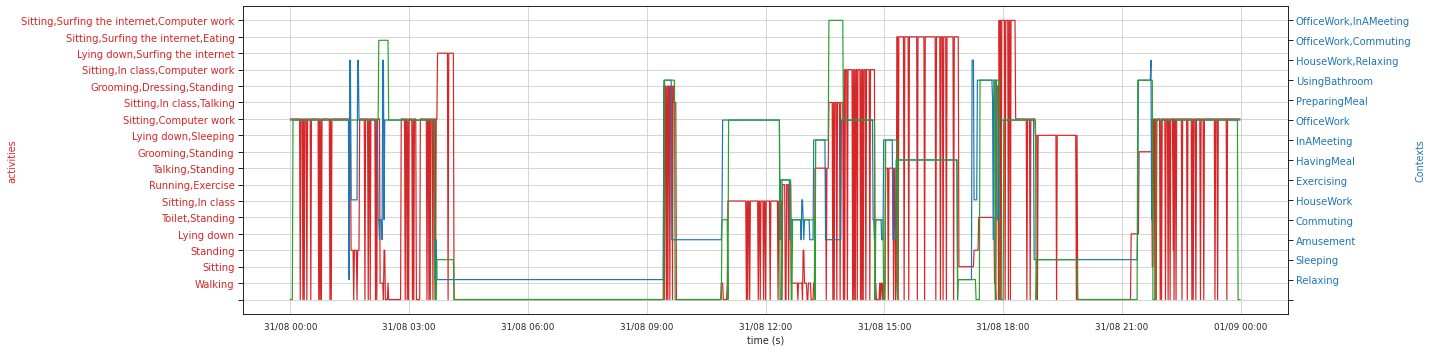

In [166]:
fig, ax1 = plt.subplots(1,1,figsize=(20,5))
ax1.xaxis.set_major_formatter(dates.DateFormatter("%d/%m %H:%M"))
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('activities', color=color)
ax1.set_yticks(range(len(all_contexts + all_activities)))
ax1.set_yticklabels(['']*len(all_contexts) + all_activities,fontsize=10)
ax1.plot(df_ts['datetime'], df_ts['activity_idx'] + len(all_contexts), color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Contexts', color=color)
ax2.set_yticks(range(len(all_contexts)))
ax2.set_yticklabels(all_contexts,fontsize=10)
ax2.plot(df_ts['datetime'], df_ts['context_idx'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
ax2.plot(df_ts['datetime'], df_ts['gt_idx'], color=color)
# ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

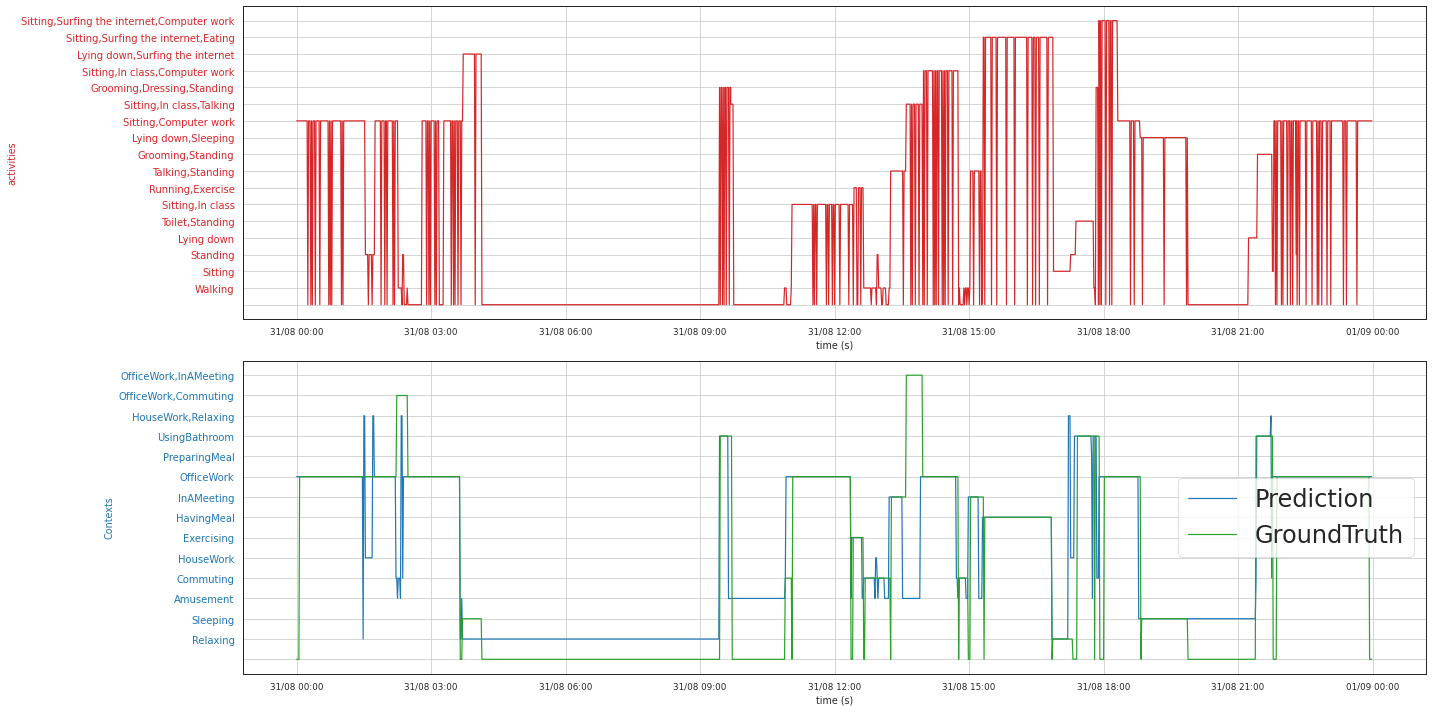

In [175]:
fig, axn = plt.subplots(2,1,figsize=(20,10))
ax1,ax2 = axn[0],axn[1]
color = 'tab:red'
ax1.xaxis.set_major_formatter(dates.DateFormatter("%d/%m %H:%M"))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('activities', color=color)
ax1.set_yticks(range(len(all_activities)))
ax1.set_yticklabels(all_activities,fontsize=10)
ax1.plot(df_ts['datetime'], df_ts['activity_idx'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

# ax2 = ax1.twinx()
color = 'tab:blue'
ax2.xaxis.set_major_formatter(dates.DateFormatter("%d/%m %H:%M"))
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Contexts', color=color)
ax2.set_yticks(range(len(all_contexts)))
ax2.set_yticklabels(all_contexts,fontsize=10)
ax2.plot(df_ts['datetime'], df_ts['context_idx'], color=color,label='Prediction')
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid()
color = 'tab:green'
ax2.plot(df_ts['datetime'], df_ts['gt_idx'], color=color,label='GroundTruth')
# ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(fontsize=24)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

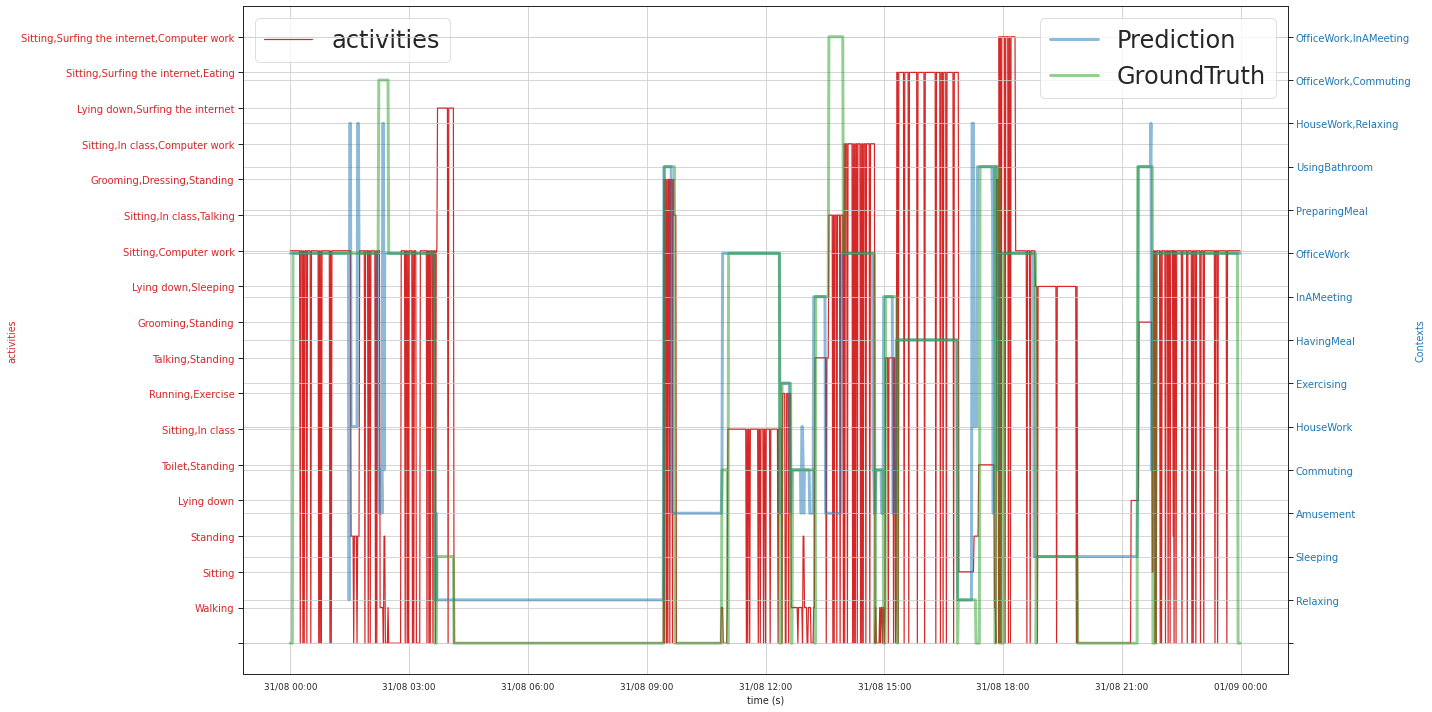

In [184]:
fig, ax1 = plt.subplots(1,1,figsize=(20,10))
# ax1,ax2 = axn[0],axn[1]
color = 'tab:red'
ax1.xaxis.set_major_formatter(dates.DateFormatter("%d/%m %H:%M"))
ax1.set_xlabel('time (s)')
ax1.set_ylabel('activities', color=color)
ax1.set_yticks(range(len(all_activities)))
ax1.set_yticklabels(all_activities,fontsize=10)
ax1.plot(df_ts['datetime'], df_ts['activity_idx'], color=color, label='activities')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()
ax1.legend(loc='upper left',fontsize=24)
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.xaxis.set_major_formatter(dates.DateFormatter("%d/%m %H:%M"))
ax2.set_xlabel('time (s)')
ax2.set_ylabel('Contexts', color=color)
ax2.set_yticks(range(len(all_contexts)))
ax2.set_yticklabels(all_contexts,fontsize=10)
ax2.plot(df_ts['datetime'], df_ts['context_idx'], color=color,label='Prediction',linewidth=3,alpha=0.5)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid()
color = 'tab:green'
ax2.plot(df_ts['datetime'], df_ts['gt_idx'], color=color,label='GroundTruth',linewidth=3,alpha=0.5)
# ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(fontsize=24)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()